<a href="https://colab.research.google.com/github/JuanTabarez/Analisis_Numerico_2020_2/blob/master/Documento_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curva de carga**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

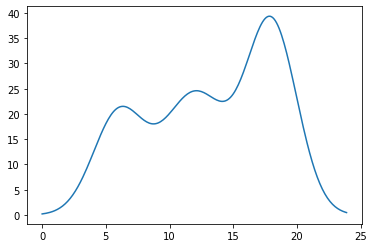

In [ ]:
x = np.arange(0,24,0.1)

mean, standard_deviation = 6,2

y1=norm(mean,standard_deviation)
m2,sd2 = 12,2.5
y2=norm(m2,sd2)
m3,sd3 = 18,2
y3 = norm(m3,sd3)

#plt.plot(x,4*y1.pdf(x))
#plt.plot(x,6*y2.pdf(x))
#plt.plot(x,8*y3.pdf(x))

demanda = 0.1e3*y1.pdf(x) + 0.15e3*y2.pdf(x) + 0.19e3*y3.pdf(x)

plt.plot(x,demanda)


In [ ]:
print(x,demanda)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [ ]:
print(demanda.sum())

4395.975160815731


# **Curva de generacion**

[0.00000000e+00 4.80096019e-03 9.60192038e-03 ... 2.39903981e+01
 2.39951990e+01 2.40000000e+01]


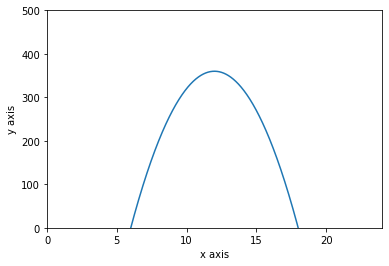

In [ ]:
from matplotlib.pyplot import *
from numpy import *
x=linspace(0,24,5000)
y=-10*(x-6)*(x-18)
plot(x,y)
xlabel("x axis")
ylabel("y axis")
print(x)

plt.ylim(00,500) 
plt.xlim(0,24)
show()


In [ ]:
def integrate(y_vals, h):  #Funcion de integral
       i=1
       total=y_vals[0]+y_vals[-1]
       for y in y_vals[1:-1]:
           if i%2 == 0:
               total+=2*y
           else:
               total+=4*y
           i+=1
       return total*(h/3.0)

In [ ]:
y_values=x
interval=1.2
area=integrate(y_values, interval)
print ("The area is", area)

The area is 71976.00096019212


In [ ]:
pip install pvlib

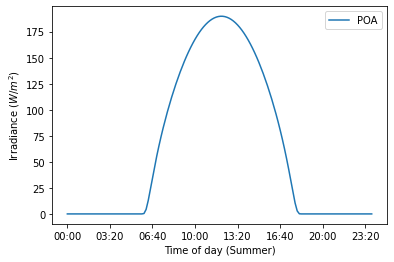

In [ ]:
from pvlib import location
from pvlib import irradiance
import pandas as pd
from matplotlib import pyplot as plt


tz = 'Etc/GMT+5'
lat, lon = 5.067, -75.517

#Crear la localizacion, lat, lon, timezone

site = location.Location(lat, lon, tz=tz)


# Definir una función para que podamos reutilizar la secuencia 
# de operaciones con diferentes ubicaciones.

def get_irradiance(site_location, date, tilt, surface_azimuth):
    # Crear intervalos de 10 minutos para un día

    times = pd.date_range(date, freq='10min', periods=6*24,
                          tz=site_location.tz)
    
   #  Genere datos claros usando el modelo Ineichen, que es el predeterminado 
   #  El método get_clearsky devuelve un marco de datos con valores para 
   #  GHI, DNI y DHI
    clearsky = site_location.get_clearsky(times)
    # Obtenga el azimuth solar y el zenith para pasar a la función de transposición
    solar_position = site_location.get_solarposition(times=times)
    # Utilice la función get_total_irradiance para transponer el GHI a POA
    POA_irradiance = irradiance.get_total_irradiance(
        surface_tilt=tilt,
        surface_azimuth=surface_azimuth,
        dni=clearsky['dni'],
        ghi=clearsky['ghi'],
        dhi=clearsky['dhi'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'])
    # Devolver DataFrame con solo GHI y POA
    return pd.DataFrame({'GHI': clearsky['ghi'],
                         'POA': POA_irradiance['poa_global']})


# Obtener datos de irradiancia 
# asumiendo una inclinación de 80 grados y orientado a 180 grados hacia el sur
summer_irradiance = get_irradiance(site, '06-20-2020', 80, 180)


# Convertir índices de marcos de datos en horas: formato de minutos para facilitar el trazado
summer_irradiance.index = summer_irradiance.index.strftime("%H:%M")

# Graficar 
fig, (ax1) = plt.subplots(1, sharey=True)
summer_irradiance['POA'].plot(ax=ax1, label='POA')
ax1.set_xlabel('Time of day (Summer)')
ax1.set_ylabel('Irradiance ($W/m^2$)')
ax1.legend()
plt.show()


In [ ]:
y_values= summer_irradiance['POA']
interval=0.7
areapoa=integrate(y_values, interval)
print ("The area POA is", areapoa)

The area POA is 6404.156652505596


In [ ]:
from __future__ import print_function

import numpy as np
from scipy.integrate import simps
from numpy import trapz


# The y values.  A numpy array is used here,
# but a python list could also be used.
y = summer_irradiance['POA']

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=0.5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=0.5)
print("area =", area)

area = 4574.374223641904
area = 4574.374223641904


# **Modelo de la bateria**

In [ ]:
pip install pypsa

In [ ]:
import pypsa

import pandas as pd

%matplotlib inline

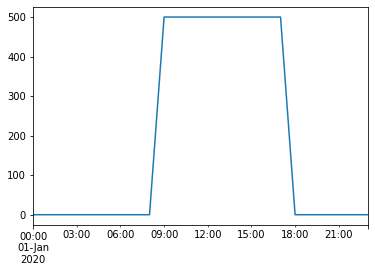

In [ ]:
# use 24 hour period for consideration
index = pd.date_range("2020-01-01 00:00","2020-01-01 23:00",freq="H")

# consumption pattern of BEV
#bev_usage = pd.Series([0.]*7 + [9.]*2 + [0.]*8 + [9.]*2 + [0.]*5,index)

# solar PV panel generation per unit of capacity
#pv_pu = pd.Series([0.]*7 + [0.2,0.4,0.6,0.75,0.85,0.9,0.85,0.75,0.6,0.4,0.2,0.1] + [0.]*5,index)

# availability of charging - i.e. only when parked at office
charger_p_max_pu = pd.Series(0.,index=index)
charger_p_max_pu["2020-01-01 09:00":"2020-01-01 17:00"] = 500

#bev_usage.plot()
#pv_pu.plot()
charger_p_max_pu.plot()

In [ ]:
y_values= charger_p_max_pu["2020-01-01 09:00":"2020-01-01 17:00"]
interval=0.5
areabatt=integrate(y_values, interval)
print ("The area is", areabatt)

The area is 2000.0


In [ ]:
P_hogar = demanda.sum()
P_pv = areapoa
Batt = P_pv - P_hogar
print (Batt)

2008.1814916898647


In [ ]:
wh = Batt
voltios = 12
ah = wh / voltios
print(ah) 

167.34845764082206


Por lo que se puede usar la bateria de 12v a 150 ah de marca NETION de referencia AGM
[Bateria](https://articulo.mercadolibre.com.co/MCO-565674178-bateria-vrla-netion-12v-100ah-recargable-sellada-_JM?matt_tool=99279475&matt_word=&matt_source=google&matt_campaign_id=11584883659&matt_ad_group_id=115595145969&matt_match_type=&matt_network=g&matt_device=c&matt_creative=478554425908&matt_keyword=&matt_ad_position=&matt_ad_type=pla&matt_merchant_id=142994614&matt_product_id=MCO565674178&matt_product_partition_id=311407048681&matt_target_id=pla-311407048681)

# **Optimizacion**

DSS = C/(A+C)

In [ ]:
import cvxopt as cvxopt

In [ ]:
# Ejemplo programación lineal con CVXopt, EJEMPLO

# Resolviendo el problema con cvxopt
A = cvxopt.matrix([[-1., -2., 1., 0.], # columna de x1
            [-1.5, -1., 0., 1.]]) # columna de x2
b = cvxopt.matrix([0., 0., 0., 0.]) # resultados
c = cvxopt.matrix([1., 1.]) # funcion objetivo

# resolviendo el problema
sol=cvxopt.solvers.lp(c,A,b)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  5e+00  2e+00  2e+00  1e+00
 1:  4.7047e-02 -0.0000e+00  2e-01  1e-01  1e-01  7e-03
 2:  4.1283e-04 -0.0000e+00  2e-03  1e-03  1e-03  1e-04
 3:  4.1254e-06 -0.0000e+00  2e-05  1e-05  1e-05  1e-06
 4:  4.1253e-08 -0.0000e+00  2e-07  1e-07  1e-07  1e-08
 5:  4.1253e-10 -0.0000e+00  2e-09  1e-09  1e-09  1e-10
Optimal solution found.


In [ ]:

# imprimiendo la solucion.
print('{0:.2f}, {1:.2f}'.format(sol['x'][0]*-1, sol['x'][1]*-1))

-0.00, -0.00


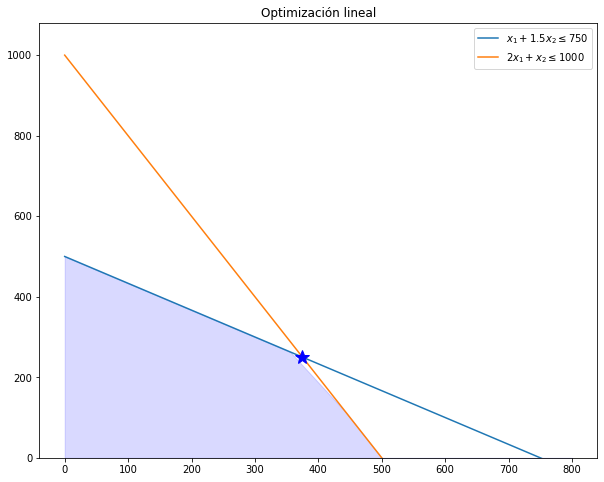

In [ ]:

# Resolviendo la optimizacion graficamente.
x_vals = np.linspace(0, 800, 10) # 10 valores entre 0 y 800
y1 = ((750 - x_vals)/1.5) # x1 + 1.5x2 = 750
y2 = (1000 - 2*x_vals) # 2x1 + x2 = 1000
plt.figure(figsize=(10,8))
plt.plot(x_vals, y1, label=r'$x_1 + 1.5x_2 \leq 750$') 
plt.plot(x_vals, y2, label=r'$2x_1 + x_2 \leq 1000$') #
plt.plot(375, 250, 'b*', markersize=15)

# Región factible
y3 = np.minimum(y1, y2)
plt.fill_between(x_vals, 0, y3, alpha=0.15, color='b')
plt.axis(ymin = 0)
plt.title('Optimización lineal')
plt.legend()
plt.show()

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:1596: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:1599: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)


/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


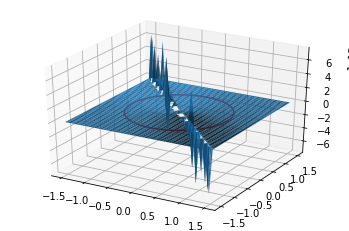

In [ ]:
import numpy as np

x = np.linspace(-1.5, 1.5)

[X, Y] = np.meshgrid(x, x)

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, X/(X+Y))

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1/ (x1+y1), 'r-')

In [ ]:
import numpy as np

def func(X):
    x = X[0]
    y = X[1]
    L = X[2] # este es el multiplicador. lambda es una variable reservada en Python
    return x + y + L * (x**2 + y**2 - 1)

In [ ]:
def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3 
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda

In [ ]:
from scipy.optimize import fsolve

# este es el maximo
X1 = fsolve(dfunc, [1, 1, 0])
print (X1, func(X1))

# este es el minimo
X2 = fsolve(dfunc, [-1, -1, 0])
print (X2, func(X2))

[ 0.70710678  0.70710678 -0.70710678] 1.4142135623730951
[-0.70710678 -0.70710678  0.70710678] -1.414213562373095
